#  Assignment 1


In [1]:
#loading the dataset using pandas
import pandas as pd
df=pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Exploratory data Analysis

In [2]:
#finding shape of dataset
df.shape

(12000, 16)

In [3]:
#understanding some of the common trends in data/Describing the dataset
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,12000.000000,11931.000000,11970.000000,11994.000000,12000.000000,12000.000000,12000.000000,1.200000e+04
mean,2010.366417,249.212304,5.626149,3.433967,26.652583,19.731667,1562.599750,4.047974e+04
std,7.610080,108.942442,1.776181,0.882499,8.843787,8.958944,1444.032657,5.992542e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.217625e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [4]:
#taking the count of each feature
df.count()

Make                 12000
Model                12000
Year                 12000
Engine Fuel Type     11997
Engine HP            11931
Engine Cylinders     11970
Transmission Type    12000
Driven_Wheels        12000
Number of Doors      11994
Market Category       8258
Vehicle Size         12000
Vehicle Style        12000
highway MPG          12000
city mpg             12000
Popularity           12000
MSRP                 12000
dtype: int64

In [5]:
# more information on the data inlcuding the data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               12000 non-null  object 
 1   Model              12000 non-null  object 
 2   Year               12000 non-null  int64  
 3   Engine Fuel Type   11997 non-null  object 
 4   Engine HP          11931 non-null  float64
 5   Engine Cylinders   11970 non-null  float64
 6   Transmission Type  12000 non-null  object 
 7   Driven_Wheels      12000 non-null  object 
 8   Number of Doors    11994 non-null  float64
 9   Market Category    8258 non-null   object 
 10  Vehicle Size       12000 non-null  object 
 11  Vehicle Style      12000 non-null  object 
 12  highway MPG        12000 non-null  int64  
 13  city mpg           12000 non-null  int64  
 14  Popularity         12000 non-null  int64  
 15  MSRP               12000 non-null  int64  
dtypes: float64(3), int64(5

# Handling Duplicates

In [6]:
# determining if an entry is a duplication
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11995     True
11996     True
11997     True
11998     True
11999     True
Length: 12000, dtype: bool

In [7]:
# removing duplicate entries
dupli_removed=df.drop_duplicates()

In [8]:
dupli_removed.shape

(11199, 16)

In [9]:
dupli_removed.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11199, dtype: bool

In [10]:
dupli_removed.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [11]:
dupli_removed.columns = [c.replace(' ', '_') for c in dupli_removed.columns]

In [12]:
Hp_min=dupli_removed.Engine_HP.min()
Hp_max=dupli_removed.Engine_HP.max()
q1=dupli_removed.Engine_HP.quantile(0.25)
q2=dupli_removed.Engine_HP.quantile(0.5)
q3=dupli_removed.Engine_HP.quantile(0.75)
iqr=q3-q1

In [13]:
lower_cutoff = q1 - 1.5*iqr
lower_cutoff

-24.5

In [14]:
upper_cutoff = q3 + 1.5*iqr
upper_cutoff

499.5

In [15]:
print("HP_min=",Hp_min,"Hp_max=",Hp_max)

HP_min= 55.0 Hp_max= 1001.0


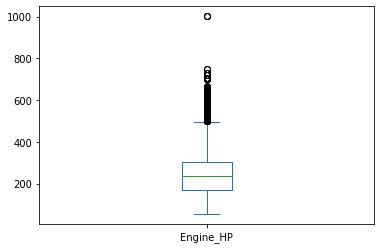

In [17]:
import matplotlib.pyplot as plt
#box plot plotiing outliers in Engine_HP
dupli_removed.Engine_HP.plot(kind='box')
plt.savefig('box1.png')

In [18]:
dupli_removed.Engine_HP.clip(upper=upper_cutoff,inplace=True)

C:\Users\dimbl\AppData\Local\Temp\ipykernel_29868\2381378934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli_removed.Engine_HP.clip(upper=upper_cutoff,inplace=True)


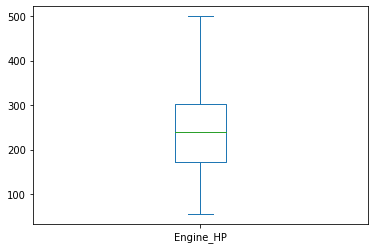

In [19]:
dupli_removed.Engine_HP.plot(kind='box')
plt.savefig('box2.png')

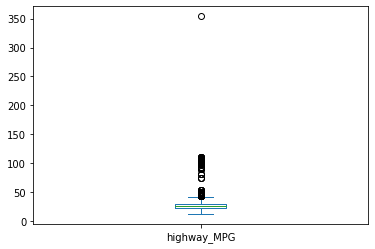

In [20]:
#box plot describing outlier in highway_MPG
dupli_removed.highway_MPG.plot(kind='box')
plt.savefig('box3.png')

In [21]:
Hmpg_min=dupli_removed.highway_MPG.min()
Hmpg_max=dupli_removed.highway_MPG.max()
hmpg_q1=dupli_removed.highway_MPG.quantile(0.25)
hmpg_q2=dupli_removed.highway_MPG.quantile(0.5)
hmpg_q3=dupli_removed.highway_MPG.quantile(0.75)
hmpg_iqr=q3-q1

In [22]:
hmpg_lower_cutoff = hmpg_q1 - 1.5*hmpg_iqr
hmpg_upper_cutoff = hmpg_q3 + 1.5*hmpg_iqr

In [23]:
dupli_removed.highway_MPG.clip(upper=hmpg_lower_cutoff,inplace=True)

C:\Users\dimbl\AppData\Local\Temp\ipykernel_29868\366090895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli_removed.highway_MPG.clip(upper=hmpg_lower_cutoff,inplace=True)


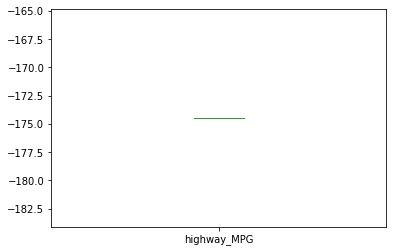

In [24]:
dupli_removed.highway_MPG.plot(kind='box')
plt.savefig('box4.png')

# Central Tendency & Dispersion

In [25]:
#Calculating Mean
dupli_removed.mean()

C:\Users\dimbl\AppData\Local\Temp\ipykernel_29868\563088683.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dupli_removed.mean()


Year                 2010.714528
Engine_HP             250.064690
Engine_Cylinders        5.665950
Number_of_Doors         3.454123
highway_MPG          -174.500000
city_mpg               19.731851
Popularity           1558.483347
MSRP                41925.927136
dtype: float64

In [26]:
# determining mode
dupli_removed.mode()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,Chevrolet,Silverado 1500,2016,regular unleaded,499.5,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,Sedan,-174.5,17,1385,2000


In [27]:
# determining median
dupli_removed.median()

C:\Users\dimbl\AppData\Local\Temp\ipykernel_29868\2329225466.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dupli_removed.median()


Year                 2015.0
Engine_HP             239.0
Engine_Cylinders        6.0
Number_of_Doors         4.0
highway_MPG          -174.5
city_mpg               18.0
Popularity           1385.0
MSRP                30675.0
dtype: float64

In [28]:
# determining standard deviation
dupli_removed.std()

C:\Users\dimbl\AppData\Local\Temp\ipykernel_29868\1797620028.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dupli_removed.std()


Year                    7.228211
Engine_HP             100.288788
Engine_Cylinders        1.797021
Number_of_Doors         0.872946
highway_MPG             0.000000
city_mpg                9.177555
Popularity           1445.668872
MSRP                61535.047817
dtype: float64

In [29]:
# checking for null values
dupli_removed.isna()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
#finding total number of null values in each column
dupli_removed.isna().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3376
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [31]:
#percentage of null values among each features
dupli_removed.isna().sum()/df.shape[0]

Make                 0.000000
Model                0.000000
Year                 0.000000
Engine_Fuel_Type     0.000250
Engine_HP            0.005750
Engine_Cylinders     0.002500
Transmission_Type    0.000000
Driven_Wheels        0.000000
Number_of_Doors      0.000500
Market_Category      0.281333
Vehicle_Size         0.000000
Vehicle_Style        0.000000
highway_MPG          0.000000
city_mpg             0.000000
Popularity           0.000000
MSRP                 0.000000
dtype: float64

# Heatmap showing correlation between different numerical attributes in the dataset

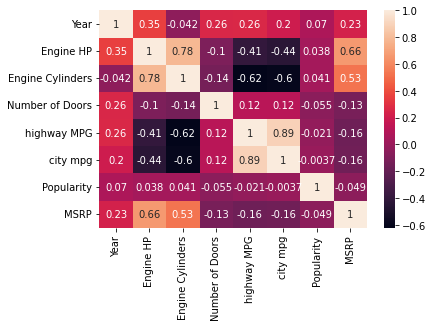

In [32]:
import seaborn as sns
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.savefig('heatmap.png')
plt.show()

In [169]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dimbl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Some important plots

C:\Users\dimbl\AppData\Local\Temp\ipykernel_29868\2879938512.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig_size" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('hist01.png',fig_size=(20,6))


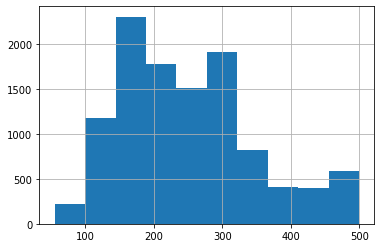

In [33]:
# histogram describing the trends in engine power of different cars
import matplotlib.pyplot as plt
dupli_removed.Engine_HP.hist()
plt.savefig('hist01.png',fig_size=(20,6))
plt.show()

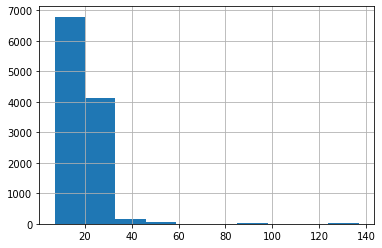

In [48]:
# histogram describing common trend in city_mpg among cars
dupli_removed.city_mpg.hist()
plt.savefig('hist02.png')
plt.show()


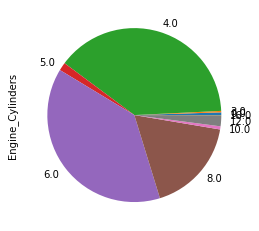

In [35]:
#piechart describing types of engine_cylinders used in cars.
dupli_removed.groupby('Engine_Cylinders').Engine_Cylinders.count().plot(kind='pie')
plt.savefig('pie1.png')
plt.show()


In [36]:
dupli_removed


,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,-174.5,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,-174.5,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,-174.5,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,-174.5,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,-174.5,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,-174.5,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,-174.5,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,-174.5,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,-174.5,16,204,50920


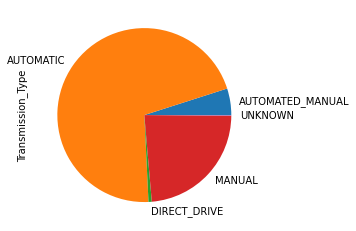

In [37]:
# piechart describing trends in different transmission type in cars
dupli_removed.groupby('Transmission_Type').Transmission_Type.count().plot(kind='pie')
plt.savefig('pie2.png')
plt.show()


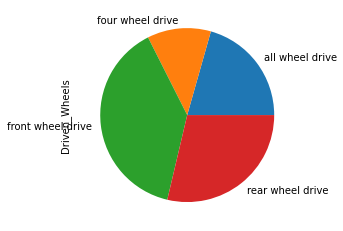

In [38]:

dupli_removed.groupby('Driven_Wheels').Driven_Wheels.count().plot(kind='pie')
plt.savefig('pie3.png')
plt.show()


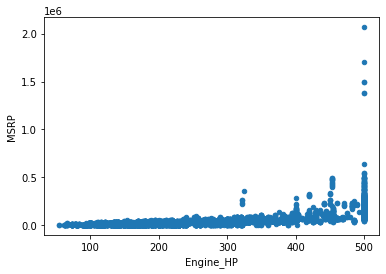

In [39]:
#scatter plot plotting MSRP vs Engine_HP
dupli_removed.plot(x='Engine_HP',y='MSRP',kind = 'scatter')
plt.savefig('sca1.png')
plt.show()


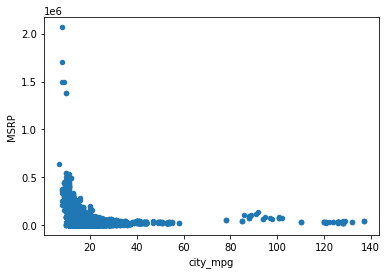

In [40]:
#scatter plot plotting MSRP vs city_mpg
dupli_removed.plot(x='city_mpg',y='MSRP',kind = 'scatter')
plt.savefig('sca2.png')
plt.show()


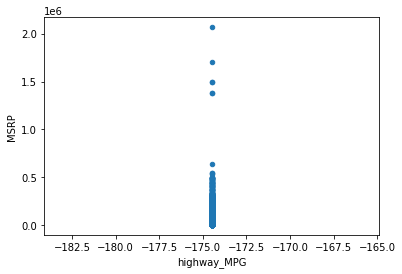

In [41]:
#scatter plot plotting MSRP vs highway_MPG
dupli_removed.plot(x='highway_MPG',y='MSRP',kind = 'scatter')
plt.savefig('sca3.png')
plt.show()

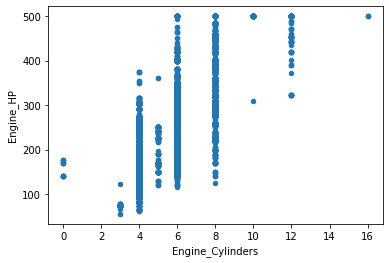

In [42]:
#scatter plot plotting Engine_Cylinders vs Engine_HP
dupli_removed.plot(x='Engine_Cylinders',y='Engine_HP',kind = 'scatter')
plt.savefig('sca4.png')
plt.show()


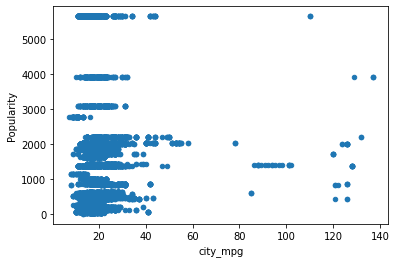

In [43]:
#scatter plot plotting city_mpg vs Popularity
import matplotlib.pyplot as plt
dupli_removed.plot(x='city_mpg',y='Popularity',kind = 'scatter')
plt.savefig('sca5.jpg')
plt.show()


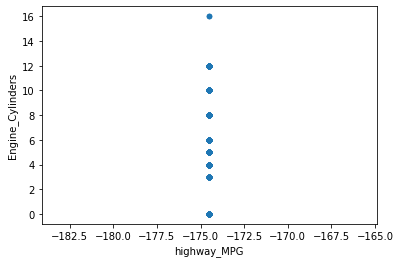

In [44]:
#scatter plot plotting Engine_Cylinders vs highway_MPG
dupli_removed.plot(x='highway_MPG',y='Engine_Cylinders',kind = 'scatter')
plt.savefig('sca6.png')
plt.show()

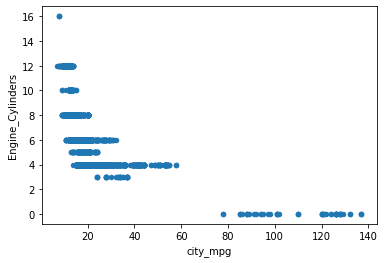

In [45]:
#scatter plot plotting Engine_Cylinders vs city_mpg
dupli_removed.plot(x='city_mpg',y='Engine_Cylinders',kind = 'scatter')
plt.savefig('sca7.png')
plt.show()

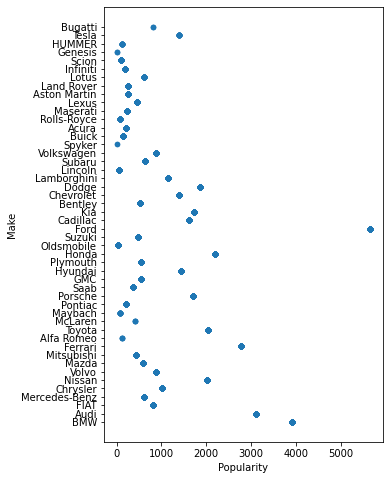

In [46]:
#scatter plot plotting Popularity vs Make
dupli_removed.plot(x='Popularity',y='Make',kind = 'scatter',figsize=(5,8))
plt.savefig('sca8.png')
plt.show()

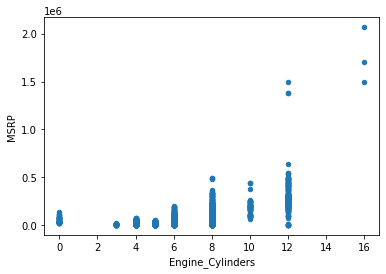

In [47]:
#scatter plot plotting Engine_Cylinders vs MSRP
dupli_removed.plot(x='Engine_Cylinders',y='MSRP',kind = 'scatter')
plt.savefig('sca9.png')
plt.show()